In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-67.8881753813067 -176.97545706249855
-43.69962594976327 -142.26539245120557
75.99114014415707 173.69881957114006
-2.8817033095782847 2.208768698694257
-7.0337909877507485 66.99683740603066
14.258835436623599 87.59545088315701
-48.480503381608955 -150.9105904919211
16.300390405006397 85.17251542541084
-76.62279798297577 -22.923503887345134
12.734698819815065 51.79932034693027
19.384329147434542 -150.32299649978734
-40.43012179990194 13.872166890047538
47.35209991497007 164.03251434461504
43.796082931375565 -129.87952348898494
-76.52010082711551 35.9059456932836
-36.51752533746567 43.26471663761063
-49.827842166450786 -43.010394644778614
-84.26965629675819 -36.77465056978534
89.06050178000154 -170.14083489597658
-82.39476678475518 -109.45838361391749
-44.395003474134974 -177.86954673898177
-50.89645327802165 -77.01714095419707
51.39160723629831 84.47836194036125
-63.592224560395394 -75.0770458518719
-31.11845246425223 87.82872497237878
60.06551415228242 120.75735180819942
35.82358302380

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [6]:
#Import citipy
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create counters.
record_count = 1
set_count = 1
city_data = []
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(7)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | komsomolskiy
Processing Record 4 of Set 1 | port-gentil
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | narasannapeta
Processing Record 7 of Set 1 | yarada
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | bereda
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 13 of Set 1 | north bend
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | soloneshnoye
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | khani
Processing Record 22 of Set 1 | nikolskoye
Processin

Processing Record 41 of Set 4 | bowen
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | karratha
Processing Record 44 of Set 4 | valley station
Processing Record 45 of Set 4 | luganville
Processing Record 46 of Set 4 | fuyang
Processing Record 47 of Set 4 | barbar
City not found. Skipping...
Processing Record 48 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 49 of Set 4 | pangnirtung
Processing Record 50 of Set 4 | kozmodemyansk
Processing Record 1 of Set 5 | klaksvik
Processing Record 2 of Set 5 | lebanon
Processing Record 3 of Set 5 | alushta
Processing Record 4 of Set 5 | pasighat
Processing Record 5 of Set 5 | katha
City not found. Skipping...
Processing Record 6 of Set 5 | port augusta
Processing Record 7 of Set 5 | kodiak
Processing Record 8 of Set 5 | itarema
Processing Record 9 of Set 5 | necochea
Processing Record 10 of Set 5 | raga
Processing Record 11 of Set 5 | grenfell
Processing Record 12 of Set 5 | mega
Processing Record 13 of Set

Processing Record 29 of Set 8 | meulaboh
Processing Record 30 of Set 8 | aklavik
Processing Record 31 of Set 8 | port-cartier
Processing Record 32 of Set 8 | strezhevoy
Processing Record 33 of Set 8 | winchester
Processing Record 34 of Set 8 | el vigia
Processing Record 35 of Set 8 | swakopmund
Processing Record 36 of Set 8 | kuala lipis
Processing Record 37 of Set 8 | sokolka
Processing Record 38 of Set 8 | bayonet point
Processing Record 39 of Set 8 | padre bernardo
Processing Record 40 of Set 8 | ahuimanu
Processing Record 41 of Set 8 | ugoofaaru
Processing Record 42 of Set 8 | airai
Processing Record 43 of Set 8 | amderma
City not found. Skipping...
Processing Record 44 of Set 8 | ous
Processing Record 45 of Set 8 | tyukhtet
Processing Record 46 of Set 8 | gao
Processing Record 47 of Set 8 | ust-ishim
Processing Record 48 of Set 8 | yerbogachen
Processing Record 49 of Set 8 | rungata
City not found. Skipping...
Processing Record 50 of Set 8 | tessalit
Processing Record 1 of Set 9 |

Processing Record 19 of Set 12 | los llanos de aridane
Processing Record 20 of Set 12 | sangar
Processing Record 21 of Set 12 | ust-uda
Processing Record 22 of Set 12 | burnie
Processing Record 23 of Set 12 | isangel
Processing Record 24 of Set 12 | sumbe
Processing Record 25 of Set 12 | paungde
Processing Record 26 of Set 12 | zhenlai
Processing Record 27 of Set 12 | lagoa
Processing Record 28 of Set 12 | savannakhet
Processing Record 29 of Set 12 | cullman
Processing Record 30 of Set 12 | matagami
Processing Record 31 of Set 12 | emerald
Processing Record 32 of Set 12 | kaeo
Processing Record 33 of Set 12 | pakpattan
Processing Record 34 of Set 12 | te anau
Processing Record 35 of Set 12 | george town
Processing Record 36 of Set 12 | beira
Processing Record 37 of Set 12 | las vegas
Processing Record 38 of Set 12 | leh
Processing Record 39 of Set 12 | buala
Processing Record 40 of Set 12 | merauke
Processing Record 41 of Set 12 | tongliao
Processing Record 42 of Set 12 | dwarka
Proces

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_raw_df = pd.DataFrame(city_data)
city_data_raw_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,75.36,88,75,10.36,TO,2022-07-18 21:32:17
1,Mataura,-46.1927,168.8643,43.48,97,100,1.68,NZ,2022-07-18 21:25:14
2,Komsomolskiy,40.4272,71.7189,81.32,26,0,11.50,UZ,2022-07-18 21:32:53
3,Port-Gentil,-0.7193,8.7815,75.16,83,100,11.50,GA,2022-07-18 21:33:33
4,Hithadhoo,-0.6000,73.0833,81.37,76,100,11.12,MV,2022-07-18 21:35:05
5,Narasannapeta,18.4167,84.0500,79.11,86,99,5.10,IN,2022-07-18 21:35:05
6,Yarada,17.6500,83.2667,80.92,89,75,4.61,IN,2022-07-18 21:29:45
7,Ushuaia,-54.8000,-68.3000,44.26,53,40,11.50,AR,2022-07-18 21:32:14
8,Bereda,43.2686,-7.5406,58.80,95,14,1.07,ES,2022-07-18 21:35:06
9,Hilo,19.7297,-155.0900,91.27,74,75,10.36,US,2022-07-18 21:25:15


In [19]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_raw_df[new_column_order]
#city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-07-18 21:32:17,-21.2000,-175.2000,75.36,88,75,10.36
1,Mataura,NZ,2022-07-18 21:25:14,-46.1927,168.8643,43.48,97,100,1.68
2,Komsomolskiy,UZ,2022-07-18 21:32:53,40.4272,71.7189,81.32,26,0,11.50
3,Port-Gentil,GA,2022-07-18 21:33:33,-0.7193,8.7815,75.16,83,100,11.50
4,Hithadhoo,MV,2022-07-18 21:35:05,-0.6000,73.0833,81.37,76,100,11.12
...,...,...,...,...,...,...,...,...,...
562,Mayumba,GA,2022-07-18 21:38:43,-3.4320,10.6554,69.94,91,19,4.99
563,Fallon,US,2022-07-18 21:38:44,39.4735,-118.7774,98.47,14,40,14.97
564,Kavarna,BG,2022-07-18 21:38:44,43.4333,28.3333,60.28,90,0,3.49
565,Norden,DE,2022-07-18 21:38:44,53.6000,7.2000,66.94,66,9,4.88


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
#today

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

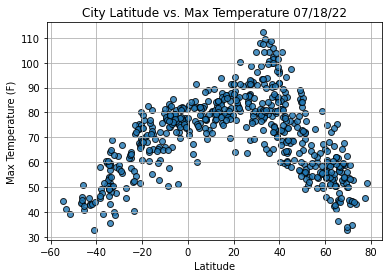

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

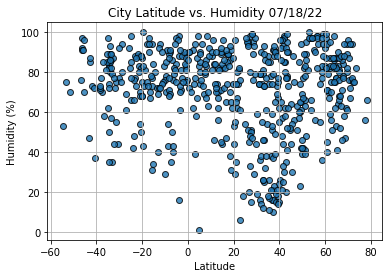

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

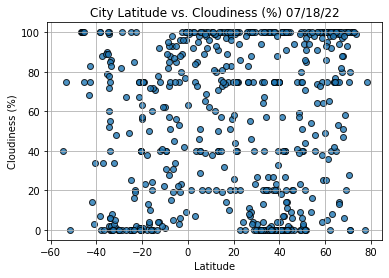

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

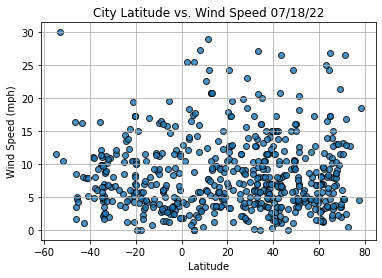

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()